# Случайные леса
Минусом решающих деревьев является то, что они часто и легко переобучаются.  
Решение этой проблемы - случайный лес (random forest) - множество решающих деревьев с одинаковыми параметрами, обученные на разных фичах и наборах данных.  
Усреднение вероятностей по набору деревьев даёт более хорошее решение.  

Параметры случайного леса:  
* Число деревьев
* Глубина и другие параметры для каждого дерева
* Размер фичей (предикторов), который поступает каждому дереву
* Размер набора данных, который поступает каждому дереву
* Bootstrap - использование выборок с повторениями

Загрузим ранее подготовленные данные датасета "Титаник"

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv('./data/titanic/train.csv')
titanic_data.head()

X = pd.read_pickle('./data/titanic/train_x.pkl')
y = pd.read_pickle('./data/titanic/train_y.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Обучим случайный лес и найдём оптимальные параметры

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier()

parameters = {'n_estimators': range(10, 40, 5), 'max_depth': range(2, 10)}

gs = GridSearchCV(estimator=clf_rf, param_grid=parameters, cv=5)

gs.fit(X_train, y_train)

print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)
print('test_score:', gs.best_estimator_.score(X_test, y_test))

best_params: {'max_depth': 4, 'n_estimators': 25}
best_score: 0.8188655462184873
test_score: 0.8135593220338984


В Data Science очень важен подбор параметров и предобработка данных.  
Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных,  
получить их представление в удобном для использования моделью виде.  
К первому относится эксплоративный анализ (EDA), а для второго есть feature engineering.

Выведем наиболее значимые для леса фичи

In [3]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': gs.best_estimator_.feature_importances_})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.356364
6,Sex_male,0.157389
0,Pclass,0.148112
4,Fare,0.147356
1,Age,0.085146
3,Parch,0.034006
9,Embarked_S,0.022655
7,Embarked_C,0.022525
2,SibSp,0.016223
8,Embarked_Q,0.010225


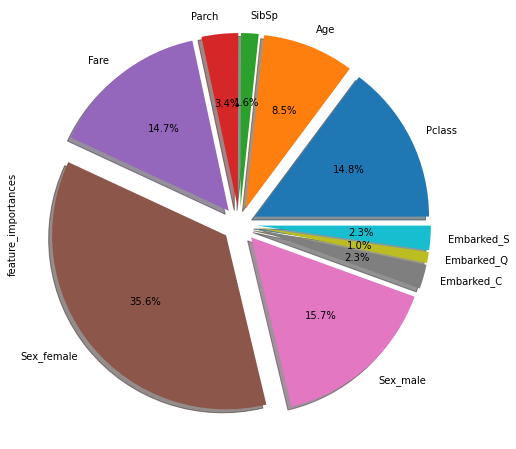

In [4]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y='feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

### Задача  
Воспользуйтесь данными о сердечных заболеваниях и обучите на них Random Forest.  
Постройте график важности переменных для классификации.

In [5]:
heart_data = pd.read_csv('./data/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
import numpy as np
rs = np.random.seed(0)  

X = heart_data.drop(['target'], axis=1)
y = heart_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=rs)

In [7]:
rf = RandomForestClassifier(10, max_depth=5, random_state=rs)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

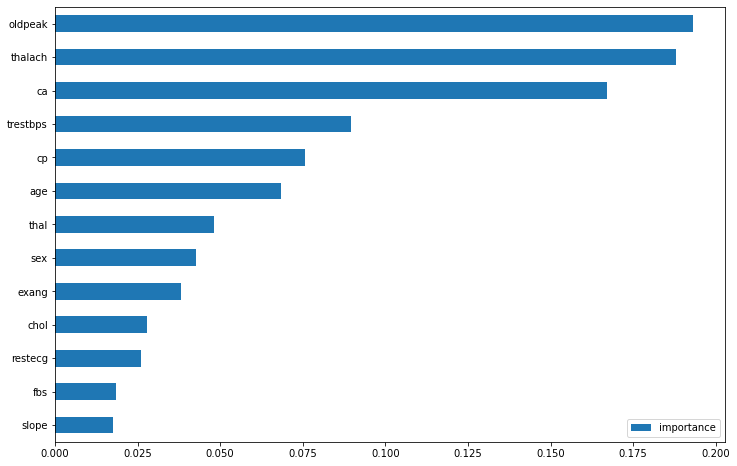

In [8]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))